# CNN
Redes Neuronales

In [1]:
import tensorflow as tf
from keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Directorio donde se encuentran las imágenes
data_dir = 'D:\\U\\7. Septimo\\RI\\ir24a\\week14\\caltech-101'

In [3]:
# Cargar las imágenes desde el directorio
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

Found 9144 files belonging to 102 classes.
Using 7316 files for training.
Found 9144 files belonging to 102 classes.
Using 1828 files for validation.


In [4]:
# Obtener el número de clases
class_names = train_dataset.class_names
num_classes = len(class_names)

In [5]:
# Preprocesar las imágenes (opcional, si es necesario)
def preprocess_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset.map(preprocess_image)
test_dataset = test_dataset.map(preprocess_image)

In [6]:
# Definir el modelo
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [7]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Entrenar el modelo
model.fit(train_dataset, epochs=10, validation_data=test_dataset)

# Evaluar el modelo
loss, accuracy = model.evaluate(test_dataset)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

Epoch 1/10
229/229 [==============================] - 240s 1s/step - loss: 3.7052 - accuracy: 0.2734 - val_loss: 2.8499 - val_accuracy: 0.4158
Epoch 2/10
229/229 [==============================] - 258s 1s/step - loss: 2.1738 - accuracy: 0.5120 - val_loss: 2.4236 - val_accuracy: 0.4754
Epoch 3/10
229/229 [==============================] - 273s 1s/step - loss: 0.9398 - accuracy: 0.7693 - val_loss: 2.7850 - val_accuracy: 0.4863
Epoch 4/10
229/229 [==============================] - 284s 1s/step - loss: 0.2574 - accuracy: 0.9385 - val_loss: 3.4911 - val_accuracy: 0.4841
Epoch 5/10
229/229 [==============================] - 273s 1s/step - loss: 0.1071 - accuracy: 0.9774 - val_loss: 4.1839 - val_accuracy: 0.4710
Epoch 6/10
229/229 [==============================] - 276s 1s/step - loss: 0.0584 - accuracy: 0.9884 - val_loss: 4.8391 - val_accuracy: 0.4469
Epoch 7/10
229/229 [==============================] - 270s 1s/step - loss: 0.0733 - accuracy: 0.9836 - val_loss: 4.6221 - val_accuracy: 0.4809

In [9]:
# Mostrar imágenes mal clasificadas
misclassified_images = []
misclassified_labels = []
true_labels = []

In [10]:
for image, label in test_dataset.unbatch():
    image = tf.expand_dims(image, axis=0)  # Expandir dimensiones para la predicción
    prediction = model.predict(image)
    predicted_label = np.argmax(prediction, axis=1)[0]
    true_label = label.numpy()
    if predicted_label != true_label:
        misclassified_images.append(image[0])
        misclassified_labels.append(predicted_label)
        true_labels.append(true_label)

1/1 [==============================] - 0s 37ms/step


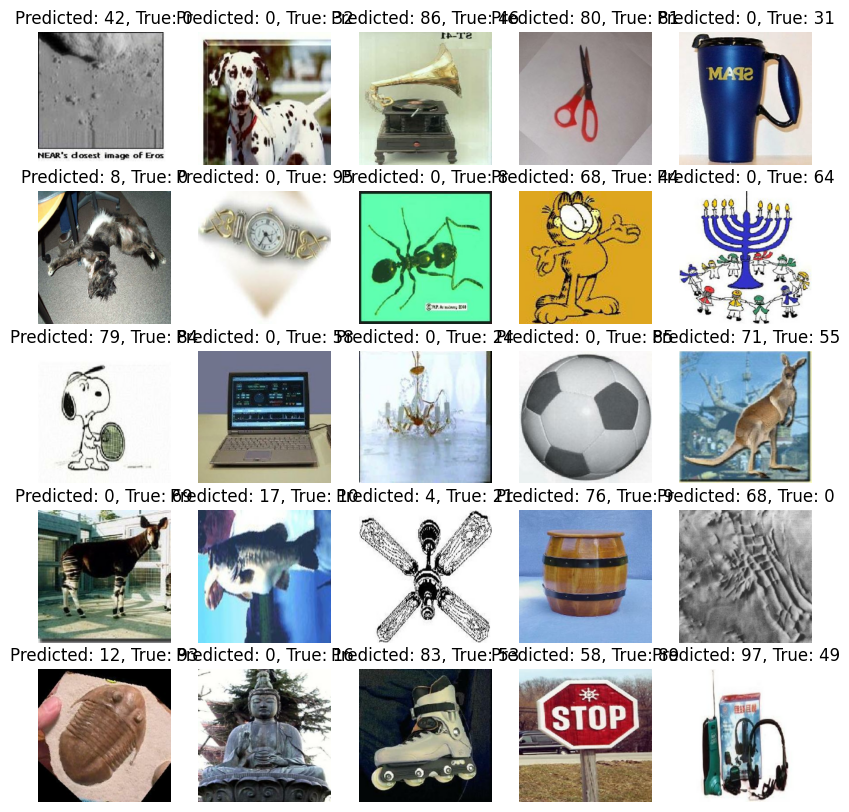

In [11]:
# Visualizar las imágenes mal clasificadas
plt.figure(figsize=(10, 10))
for i in range(min(25, len(misclassified_images))):
    plt.subplot(5, 5, i+1)
    plt.imshow(misclassified_images[i])
    plt.title(f"Predicted: {misclassified_labels[i]}, True: {true_labels[i]}")
    plt.axis('off')
plt.show()